In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#dataset contains songs from 1922 to 2021
df_songs=pd.read_csv(r"/Users/radharamyakrishnadommeti/Desktop/SpotifyFeatures.csv")
df_songs.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
#check for the null values
pd.isnull(df_songs)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232721,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232722,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232723,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
#count the number of null values for each column
pd.isnull(df_songs).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [5]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [6]:
#listing the top 10 least popular songs
leastpop=df_songs.sort_values("popularity",ascending=True).head(10)
leastpop

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.6110,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
74954,Children's Music,Sing n Play,"See, See My Playmate",3WaCwwpGoxLEkFmd6cpZO5,0,0.1390,0.556,150487,0.4390,0.006400,D,0.1720,-11.604,Major,0.0288,165.306,4/4,0.820
74958,Children's Music,Children Songs Company,By the God - Instrumental,5yDehr9ccZo3vBO8hZXFcK,0,0.2130,0.736,212547,0.4460,0.821000,D,0.2980,-12.328,Major,0.0504,130.011,4/4,0.668
74959,Children's Music,Children Songs Company,Interruption Please - Instrumental,6NEULw7AmTOAYRunPWcFvn,0,0.0131,0.639,184000,0.8440,0.095700,A#,0.0399,-8.582,Minor,0.0439,120.027,4/4,0.271
74961,Children's Music,Children Songs Company,Breeze,6v126eNn1A79yFIKGfvqLz,0,0.0280,0.607,147653,0.5540,0.000000,A,0.1690,-10.571,Major,0.3710,92.193,4/4,0.404
74962,Children's Music,Children Songs Company,Woodland,7qR2PWbDeuhh1Vzd0anb25,0,0.9950,0.529,266067,0.1540,0.414000,B,0.1230,-9.222,Minor,0.0470,69.588,4/4,0.332
74963,Children's Music,Children Songs Company,Cool Me - Instrumental,0V3Q9RYUaiLKTJIvg4KCST,0,0.2500,0.623,350080,0.4710,0.931000,A#,0.2580,-8.675,Major,0.0332,120.015,4/4,0.515
74964,Children's Music,Sing n Play,The Tortoise and the Hare,0oX193rf5y87RipsZnH8Pq,0,0.4960,0.563,201362,0.3460,0.000000,D,0.1200,-14.058,Major,0.0938,144.642,4/4,0.370
56153,Movie,Bruno Pelletier,Lié par le sang,3GO9Wo14FvMXvOKE4LItjg,0,0.0294,0.656,276027,0.6940,0.000017,A,0.0527,-6.755,Major,0.0273,120.085,4/4,0.449
74966,Children's Music,Children Songs Company,Forsaken,1rRNU87xfqvxiUsEXXyi8k,0,0.9940,0.429,129387,0.0382,0.000000,B,0.4480,-12.704,Major,0.0557,156.807,3/4,0.474


In [7]:
#lising the most popular top 10 songs
mostpopular=df_songs.sort_values("popularity",ascending=False).head(10)
mostpopular

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
66643,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
107909,Pop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
138918,Reggaeton,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
107829,Pop,Ava Max,Sweet but Psycho,25sgk305KZfyuqVBQIahim,97,0.0691,0.719,187436,0.704,0.000000,C#,0.1660,-4.724,Major,0.0476,133.002,4/4,0.628


In [8]:
#analyse the descriptive statistics
df_songs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


In [13]:
#change the popularity column as index
df_songs.set_index("popularity",inplace=True)
df_songs.index=pd.to_datetime(df_songs.index)
df_songs.head()

,genre,artist_name,track_name,track_id,acousticness,danceability,duration_ms,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
popularity,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.611,0.389,99373,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1970-01-01 00:00:00.000000001,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.246,0.590,137373,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
1970-01-01 00:00:00.000000003,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.952,0.663,170267,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
1970-01-01 00:00:00.000000000,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.703,0.240,152427,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
1970-01-01 00:00:00.000000004,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.950,0.331,82625,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [15]:
#to extract a particular row value(4th row) from a specific column(name)
df_songs["track_name"].iloc[4]

'Ouverture'

In [16]:
#convert the duration_ms column from ms to sec
df_songs['duration']=df_songs['duration_ms'].apply(lambda x: round(x/1000))   #div by 1000 to convert ms to sec 
df_songs.drop('duration_ms',inplace=True,axis=1)       #remove the duration in ms col
df_songs.duration.head(5)

popularity
1970-01-01 00:00:00.000000000     99
1970-01-01 00:00:00.000000001    137
1970-01-01 00:00:00.000000003    170
1970-01-01 00:00:00.000000000    152
1970-01-01 00:00:00.000000004     83
Name: duration, dtype: int64

In [18]:
#remove the unwanted columns like key,mode and explicit
df_songs.drop(['key','mode','tempo'],axis=1)

,genre,artist_name,track_name,track_id,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,time_signature,valence,duration
popularity,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.61100,0.389,0.000000,0.3460,-1.828,0.0525,4/4,0.814,99
1970-01-01 00:00:00.000000001,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.24600,0.590,0.000000,0.1510,-5.559,0.0868,4/4,0.816,137
1970-01-01 00:00:00.000000003,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.95200,0.663,0.000000,0.1030,-13.879,0.0362,5/4,0.368,170
1970-01-01 00:00:00.000000000,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.70300,0.240,0.000000,0.0985,-12.178,0.0395,4/4,0.227,152
1970-01-01 00:00:00.000000004,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.95000,0.331,0.123000,0.2020,-21.150,0.0456,4/4,0.390,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000039,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,0.00384,0.687,0.544000,0.0845,-10.626,0.0316,4/4,0.962,326
1970-01-01 00:00:00.000000038,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0.03290,0.785,0.000880,0.2370,-6.944,0.0337,4/4,0.969,282
1970-01-01 00:00:00.000000047,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,0.90100,0.517,0.000000,0.0945,-8.282,0.1480,4/4,0.813,167


In [19]:
#The Pearson correlation measures the strength of the linear relationship between two variables.
#It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.
correlation=df_songs.corr(method='pearson')
correlation

,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
acousticness,1.000000,-0.364546,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798,0.011200
danceability,-0.364546,1.000000,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154,-0.125781
instrumentalness,0.316154,-0.364941,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522,0.076017
liveness,0.069004,-0.041684,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804,0.023791
loudness,-0.690202,0.438668,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901,-0.047614
speechiness,0.150935,0.134560,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842,-0.016161
tempo,-0.238247,0.021939,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857,-0.028447
valence,-0.325798,0.547154,-0.307522,0.011804,0.399901,0.023842,0.134857,1.000000,-0.141815
duration,0.011200,-0.125781,0.076017,0.023791,-0.047614,-0.016161,-0.028447,-0.141815,1.000000


[Text(0.5, 0, 'acousticness'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'instrumentalness'),
 Text(3.5, 0, 'liveness'),
 Text(4.5, 0, 'loudness'),
 Text(5.5, 0, 'speechiness'),
 Text(6.5, 0, 'tempo'),
 Text(7.5, 0, 'valence'),
 Text(8.5, 0, 'duration')]

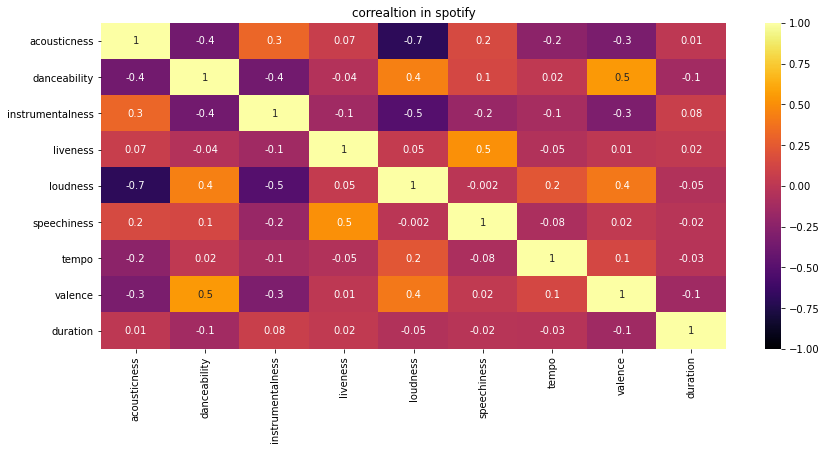

In [20]:
#visualize the values using heatmap
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(correlation,vmin=-1, vmax=1, cmap='inferno', center=0,annot=True, fmt='.1g',linewidths=0, linecolor='white')
#annot =true will write the value in each cell
#fmt - size(no. of digits to be displayed after decimal point) of the string written in annot 
heatmap.set_title('correaltion in spotify')
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

In [21]:
#there is high positive correl bet loudness and energy
#there is a strong neg correl betenergy and acousticness

In [22]:
#as the dataset is large ,create a sample df to work on it
sample_df=df_songs.sample(int(0.004*len(df_songs)))

In [23]:
sample_df

,genre,artist_name,track_name,track_id,acousticness,danceability,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration
popularity,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,Children's Music,Children Songs Company,If I Could See as Far Ahead,0Ax4OqmnI0Hul8Kv4Fir4E,0.995000,0.5170,0.000019,C,0.1440,-8.687,Minor,0.1900,67.430,3/4,0.5110,164
1970-01-01 00:00:00.000000037,World,Julia Holter,Chaitius,2oDvVcnl8wpTNqzyc7Vrit,0.817000,0.2460,0.395000,F,0.1000,-11.900,Major,0.0348,138.232,4/4,0.1390,490
1970-01-01 00:00:00.000000023,Anime,GReeeeN,ミセナイナミダハ、きっといつか,5Yrs6JMmi0eslDtndkcezC,0.003100,0.5940,0.000000,G#,0.1260,-6.206,Major,0.0300,82.986,4/4,0.5460,243
1970-01-01 00:00:00.000000057,Rock,Scissor Sisters,Take Your Mama,0LAfANg75hYiV1IAEP3vY6,0.220000,0.7620,0.000018,G#,0.0612,-4.542,Major,0.1210,153.960,4/4,0.9330,272
1970-01-01 00:00:00.000000041,Classical,Henryk Górecki,"Symphony No. 3, Op. 36: II. Lento e Largo - Tr...",4iCn374fZg5UbGD1xFNo1m,0.896000,0.0777,0.530000,A#,0.1370,-24.763,Minor,0.0441,82.006,4/4,0.0283,585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000049,Children’s Music,Godsmack,The Enemy,0NLawlO6diSdXO9eHnFJXO,0.000006,0.3580,0.819000,D,0.3310,-6.683,Major,0.0297,79.432,4/4,0.6600,248
1970-01-01 00:00:00.000000024,Blues,Guy Davis,Maybe I'll Go,0M3Ax4slidyDfv9Hq0rYQz,0.881000,0.5980,0.009730,C#,0.1080,-13.274,Major,0.0472,156.868,4/4,0.7510,181
1970-01-01 00:00:00.000000027,Electronic,Liquid Stranger,Rocket Fuel,45Yd7s3jhypgT8AUSLzj9D,0.050900,0.8230,0.001710,C,0.1190,-7.540,Major,0.4990,140.070,4/4,0.3580,364


In [24]:
len(sample_df)

930

[Text(0.5, 1.0, 'liveness vs Loudeness')]

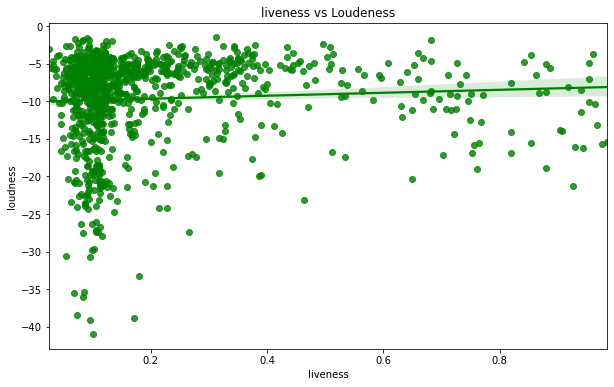

In [26]:
#as there is a correl bet liveness and loudness ,we will visualize it in regression plot
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,x='liveness',y='loudness',color='g').set(title ='liveness vs Loudeness')
#graph shows as liveliness of the song inc ,the loudness also inc.hence the reg line is upwards.

[Text(0.5, 1.0, 'tempo vs acousticness')]

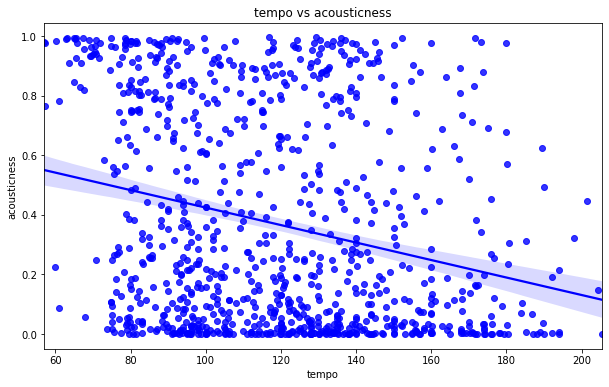

In [31]:
#let's map between tempo and acousticness
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,x='tempo',y='acousticness',color='b').set(title='tempo vs acousticness')
#the reg line is downward,as tempo inc,the acousticness dec and viseversa